1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


#### Creating the data set and storing it in a pandas data frame

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg

N = 1000
X1 = np.random.normal(0,1,N)
X2 = X1 + np.random.normal(0,3,N)
X3 = 2*X1 + X2
Data = pd.DataFrame({1:X1, 2:X2, 3:X3})

In [2]:
Data

,1,2,3
0,0.437181,0.834513,1.708874
1,0.922336,-1.043048,0.801624
2,-1.130965,-1.878713,-4.140643
3,-0.501158,3.943581,2.941265
4,1.545637,-1.715268,1.376007
5,1.173219,-3.631058,-1.284619
6,-1.359493,-3.336449,-6.055434
7,1.137713,4.874433,7.149859
8,-0.120530,-1.768915,-2.009974
9,0.234594,-0.276063,0.193124


#### Finding the eigenvalues and eigenvectors of the covariance matrix

In [3]:
Cov = np.cov(Data, rowvar=False)
Lambdas, Vecs = linalg.eig(Cov)
Lambdas

array([2.57775181e+01+0.j, 6.06088203e-16+0.j, 2.06110544e+00+0.j])

#### Finding the eigenvalues and eigenvectors using SVD

In [4]:
U, s, Vh = linalg.svd(Data)
Eigvals = s*s/(N-1)
Eigvals

array([2.57786094e+01, 2.06218519e+00, 3.25667286e-31])

#### Check that both procedures yield to the same result

In [5]:
for i in range(len(Lambdas)) : 
    print ("Eigenvalue {} calculated from Covariance Matrix".format(i+1), Lambdas[i])
    print ("Eigenvector {} calculated from Covariance Matrix".format(i+1), Vecs[i])
    print ("Eigenvalue {} calculated with SVD: \t\t".format(i+1), Eigvals[i])
    print ("Eigenvector {} calculated with SVD: \t\t".format(i+1), Vh[:,i],'\n')

Eigenvalue 1 calculated from Covariance Matrix (25.777518130175352+0j)
Eigenvector 1 calculated from Covariance Matrix [-0.11156784 -0.81649658  0.56646796]
Eigenvalue 1 calculated with SVD: 		 25.77860939039509
Eigenvector 1 calculated with SVD: 		 [-0.11154191  0.56647307 -0.81649658] 

Eigenvalue 2 calculated from Covariance Matrix (6.060882031032154e-16+0j)
Eigenvector 2 calculated from Covariance Matrix [-0.58221089 -0.40824829 -0.7031101 ]
Eigenvalue 2 calculated with SVD: 		 2.0621851883762976
Eigenvector 2 calculated with SVD: 		 [-0.58224308 -0.70308345 -0.40824829] 

Eigenvalue 3 calculated from Covariance Matrix (2.061105444882831+0j)
Eigenvector 3 calculated from Covariance Matrix [-0.80534657  0.40824829  0.42982583]
Eigenvalue 3 calculated with SVD: 		 3.2566728550011326e-31
Eigenvector 3 calculated with SVD: 		 [-0.80532689  0.42986269  0.40824829] 



The eigenvalues are not sorted in the same way, but are within a certain margin of error identical. With very small values, it can get a little problematic and relative difference can becomer large. Due to the eigenvalues not being sorted in the same way, also the eigenvectors appear to be different, when in fact, their dimensions are only switched.

#### What percentage of the variance in the data is explained by the principal components?

As the third column in our data set is just a linear combination of the first two, all the variance should be explained by just two principal components. 
The spectrum of the SVD also explains how much every eigenvalue contributes to the total variance: 


In [6]:
print("Variance of PC1: ", s[0]/s.sum())
print("Variance of PC2: ", s[1]/s.sum())

Variance of PC1:  0.779523106283028
Variance of PC2:  0.22047689371697182


#### Redefine the data in the PCA basis

In [7]:
pcData = pd.DataFrame(np.dot(Vh, Data.T))
pcData # The Data now has three rows instead of three columns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.910856e+00,-1.411405e-01,4.554589e+00,-4.608903e+00,-2.818364e-01,3.017834e+00,6.970869e+00,-8.722981e+00,2.662069e+00,-2.095957e-02,...,1.067419e+01,2.002105e+00,-1.154198e+01,1.936026e+00,4.994132e+00,1.041332e+00,4.358613e+00,-8.200712e-01,1.409209e+00,-1.085588e+01
1,3.955002e-01,1.600417e+00,-1.099677e+00,-1.792219e+00,2.673032e+00,2.665324e+00,-1.027320e+00,2.908080e-01,3.114048e-01,4.100034e-01,...,-3.204737e-01,-2.724107e-02,1.631278e+00,-1.935953e+00,-8.042655e-01,-1.792148e+00,7.987810e-01,4.810348e-01,-7.285178e-01,-1.291502e+00
2,3.009212e-16,2.842507e-16,-6.043752e-16,-1.165371e-16,4.854982e-16,3.698101e-16,-1.335426e-15,7.985267e-16,-2.090605e-16,8.299250e-17,...,-1.016177e-15,-1.929177e-16,4.358374e-16,-5.184057e-16,-4.042101e-16,-5.284599e-16,-3.141813e-16,1.633314e-16,-3.373039e-16,8.075112e-16


In [8]:
reData = pcData.drop(2)
reData

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.910856,-0.141141,4.554589,-4.608903,-0.281836,3.017834,6.970869,-8.722981,2.662069,-0.020960,...,10.674192,2.002105,-11.541983,1.936026,4.994132,1.041332,4.358613,-0.820071,1.409209,-10.855878
1,0.395500,1.600417,-1.099677,-1.792219,2.673032,2.665324,-1.027320,0.290808,0.311405,0.410003,...,-0.320474,-0.027241,1.631278,-1.935953,-0.804266,-1.792148,0.798781,0.481035,-0.728518,-1.291502


In [9]:
import matplotlib.pyplot as plt

plt.scatter(np.array(reData)[:][0], np.array(reData)[:][1], alpha=0.3)
plt.title("Scatter plot of reduced data")
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
reCov = np.cov(reData)
reCov

array([[ 2.57775181e+01, -1.08548632e-03],
       [-1.08548632e-03,  2.06110549e+00]])

/home/philipp/anaconda3/envs/Vodafone/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


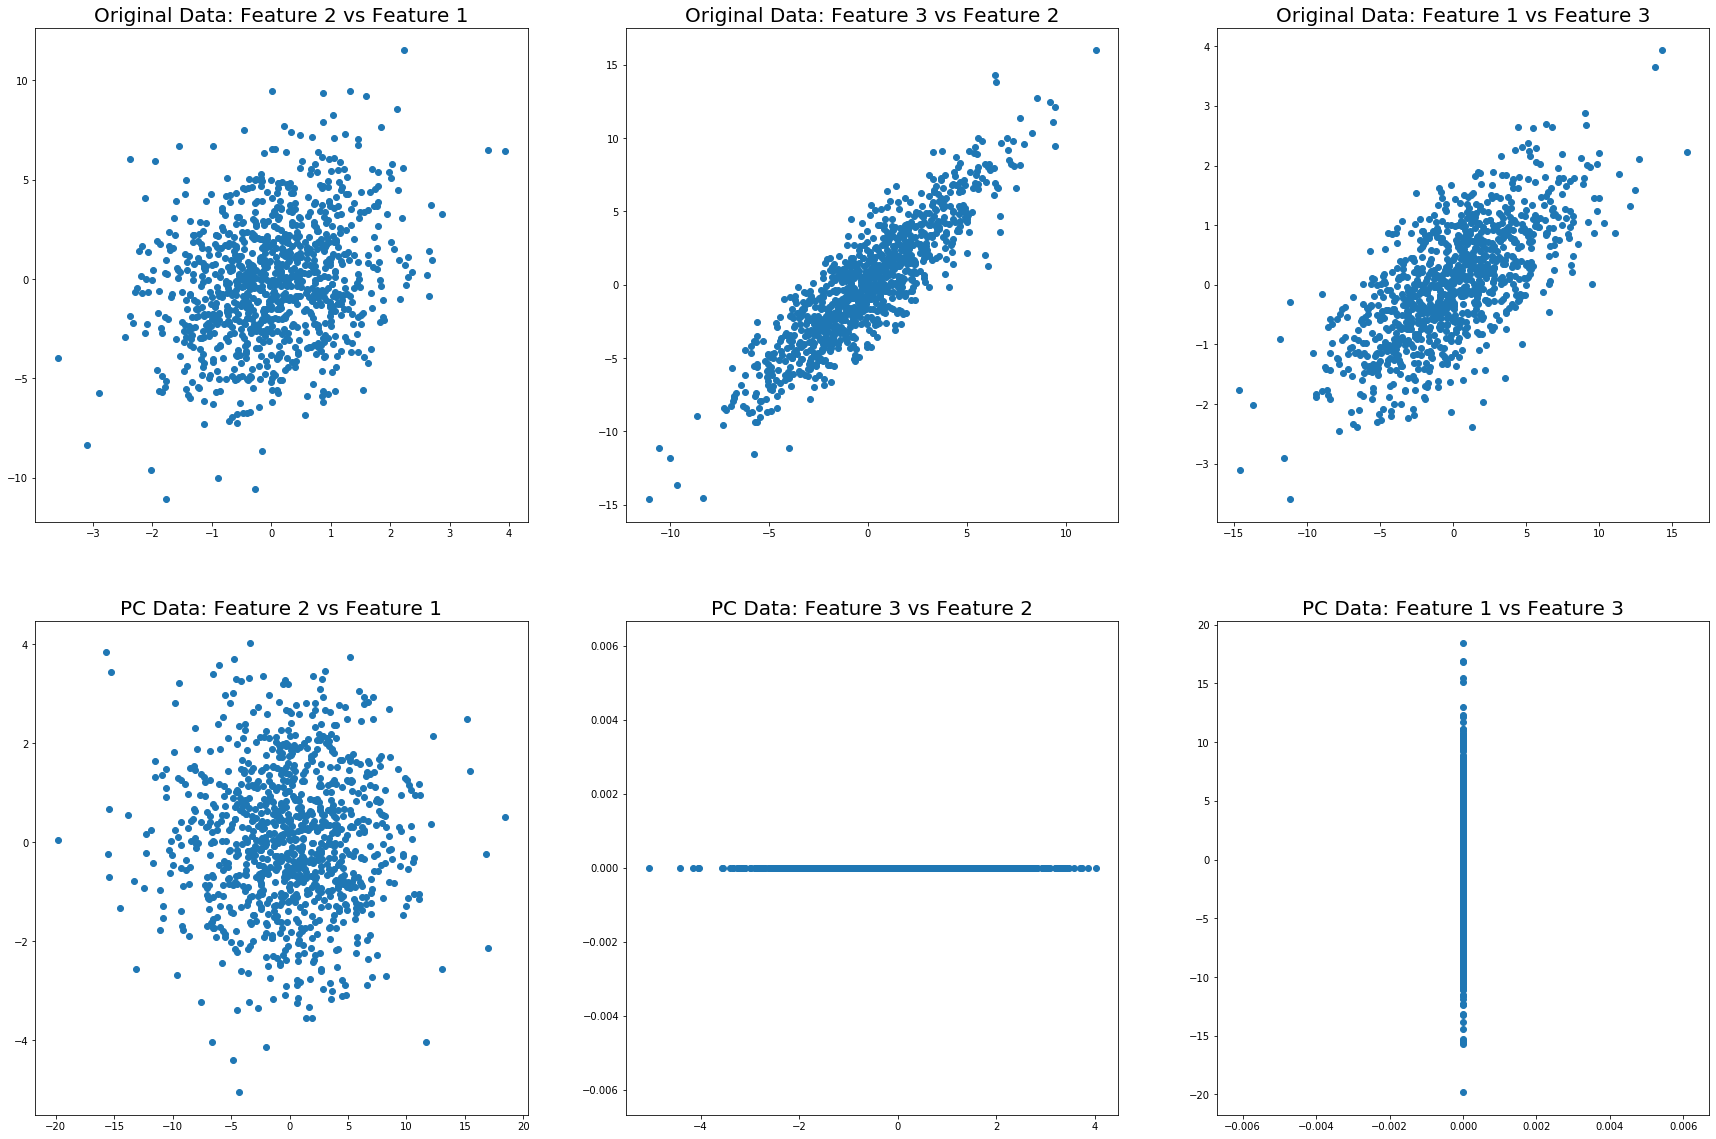

In [11]:
fig, axes = plt.subplots(2,3,figsize=(30,20))

axes[0][0].scatter(Data.iloc[:,0], Data.iloc[:,1])
axes[0][0].set_title("Original Data: Feature 2 vs Feature 1", fontsize=20)
axes[0][1].scatter(Data.iloc[:,1], Data.iloc[:,2])
axes[0][1].set_title("Original Data: Feature 3 vs Feature 2", fontsize=20)
axes[0][2].scatter(Data.iloc[:,2], Data.iloc[:,0])
axes[0][2].set_title("Original Data: Feature 1 vs Feature 3", fontsize=20)
axes[1][0].scatter(pcData.iloc[0,:], pcData.iloc[1,:])
axes[1][0].set_title("PC Data: Feature 2 vs Feature 1", fontsize=20)
axes[1][1].scatter(pcData.iloc[1,:], pcData.iloc[2,:])
axes[1][1].set_title("PC Data: Feature 3 vs Feature 2", fontsize=20)
axes[1][2].scatter(pcData.iloc[2,:], pcData.iloc[0,:])
axes[1][2].set_title("PC Data: Feature 1 vs Feature 3", fontsize=20)

fig.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [33]:
NewData = Data.copy()
for i in range(0,10) : 
    NewData[i+3] = np.random.normal(0, 1/100, N)

U1, s1, Vh1 = linalg.svd(NewData)
print("Variance of PC1: ", s1[0]/s.sum())
print("Variance of PC2: ", s1[1]/s.sum())
print("Variance of PC2: ", s1[2]/s.sum())

Variance of PC1:  0.48162696887976597
Variance of PC2:  0.14568196903436528
Variance of PC2:  0.0016726355025906614


In [36]:
pcNew = pd.DataFrame(np.dot(Vh1, NewData.T))

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.872570,-0.949859,-1.978453,3.877402,-1.559242,-3.501908,-3.451381,4.961029,-1.772324,-0.252311,...,-6.093592,-1.164163,5.759606,0.107027,-2.428599,0.542287,-3.088342,0.173508,-0.361482,7.241452
1,-0.355194,-1.018072,0.945711,0.876781,-1.702915,-1.515797,1.033490,-0.665329,-0.049546,-0.259969,...,0.791815,0.127761,-1.667182,1.328992,0.783507,1.188801,-0.263499,-0.348958,0.537705,0.215694
2,0.012274,-0.022164,-0.005802,-0.002571,-0.018339,0.004102,0.007751,0.002190,0.002807,0.009894,...,0.003955,-0.012907,-0.006493,0.007998,-0.004651,-0.008989,-0.004937,0.001293,0.021742,0.000482
3,-0.006403,0.004471,-0.009765,0.002456,0.007146,-0.004462,-0.000824,-0.002570,0.008118,-0.007768,...,-0.003416,0.002995,-0.002576,0.002623,-0.008711,-0.003281,-0.011001,0.017516,-0.001913,-0.001845
4,-0.016558,-0.011097,0.006041,-0.015223,-0.005237,0.012706,0.012511,0.002667,0.009603,-0.003174,...,0.005713,-0.010850,-0.007752,0.005109,-0.009393,0.001866,0.005783,0.000344,-0.019962,-0.001420
5,-0.012513,-0.009820,-0.002534,-0.003751,-0.020981,0.001890,0.007424,0.005123,0.004943,-0.012120,...,0.001806,0.007952,0.001001,-0.006169,-0.000664,0.013219,-0.010985,0.002319,0.003410,-0.006998
6,0.012800,0.013780,0.001433,-0.002753,-0.007938,0.003605,-0.003581,-0.008867,-0.004885,0.005581,...,-0.011610,0.009397,0.002159,0.000543,0.010900,-0.002081,-0.003312,-0.004863,-0.035786,0.004237
7,-0.002332,-0.001492,0.014730,0.002194,-0.005238,0.005477,-0.003954,-0.001055,0.006924,-0.006751,...,0.001137,0.008423,-0.014306,-0.013395,0.013018,-0.016685,0.000610,-0.003993,-0.002378,0.000196
8,0.007552,-0.000858,0.004010,-0.005016,0.001938,-0.010478,-0.002081,0.006325,0.011178,0.005293,...,0.016094,-0.020275,0.005413,0.010562,0.003906,0.003746,-0.002945,-0.006885,-0.006628,0.012662
9,0.003226,0.018412,0.013715,0.008634,-0.010954,0.007083,0.000037,0.012441,-0.011660,0.003996,...,0.010334,0.015481,-0.009993,-0.005904,-0.000454,-0.002363,-0.002227,0.020046,0.004810,0.003736


/home/philipp/anaconda3/envs/Vodafone/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


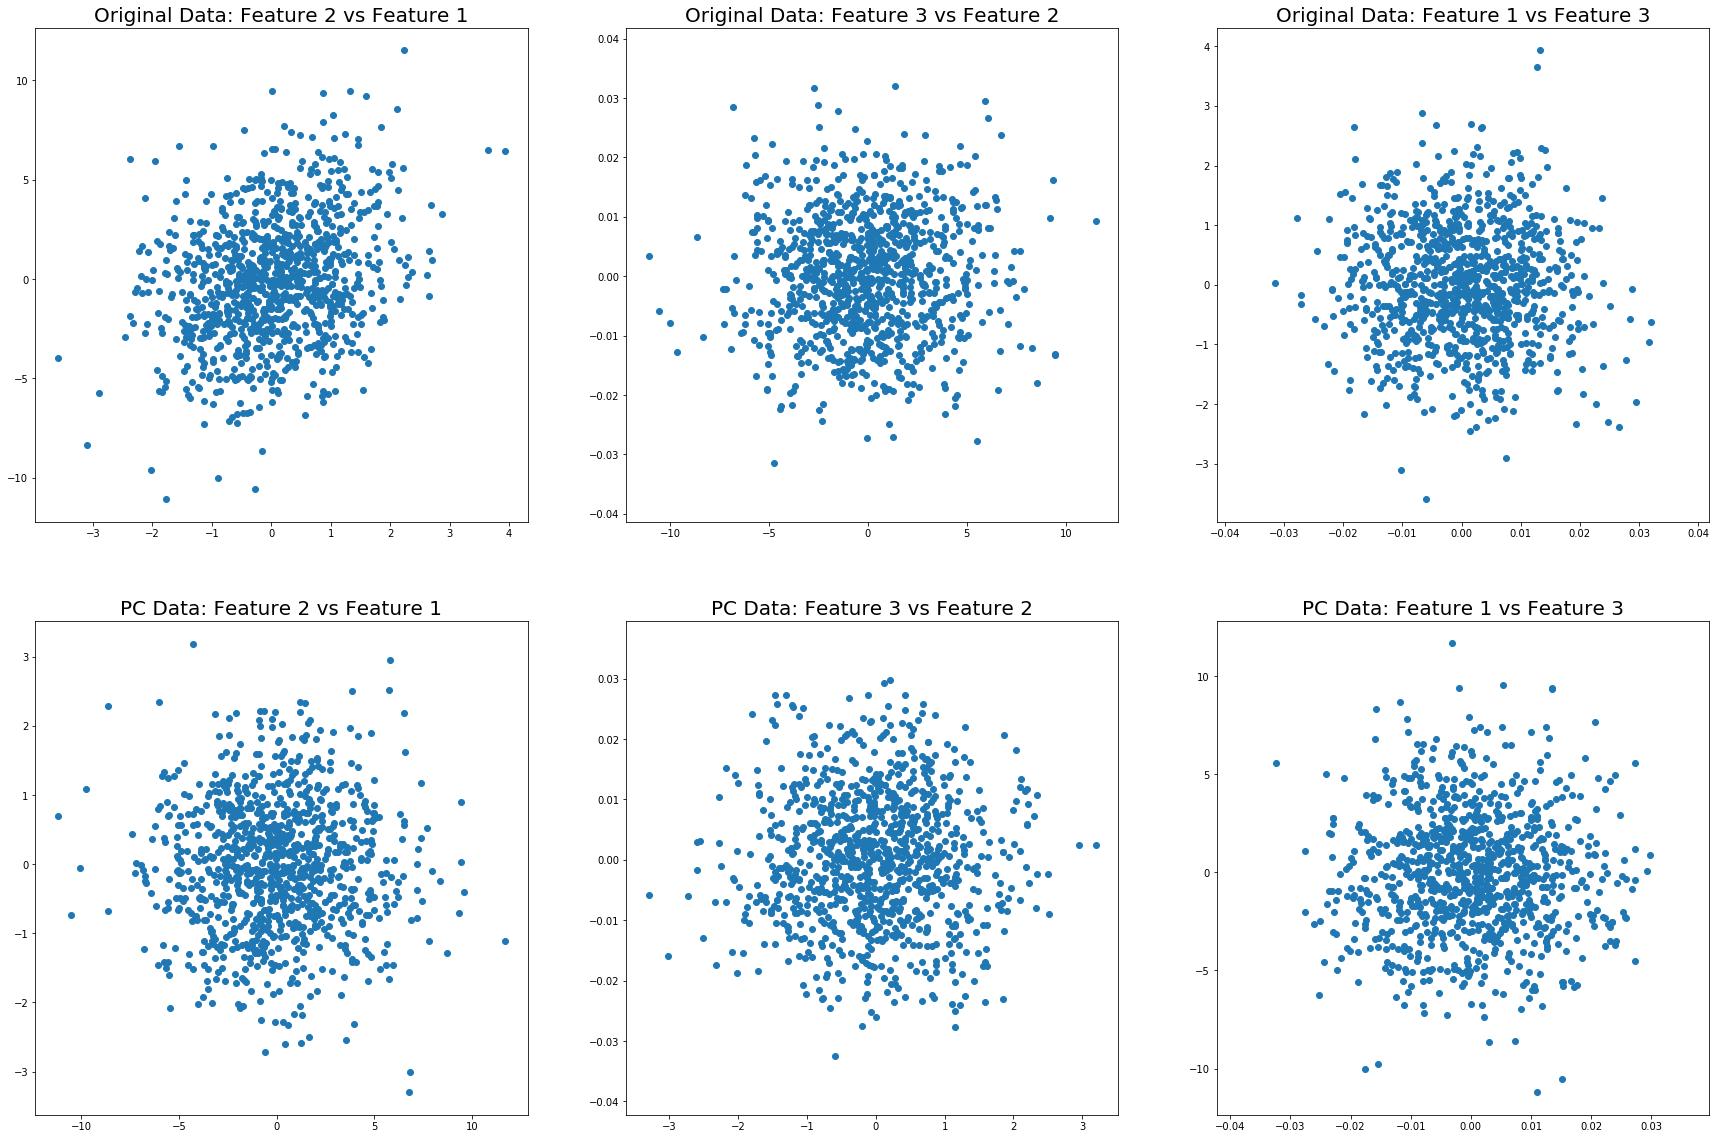

In [37]:
fig, axes = plt.subplots(2,3,figsize=(30,20))

axes[0][0].scatter(NewData.iloc[:,0], NewData.iloc[:,1])
axes[0][0].set_title("Original Data: Feature 2 vs Feature 1", fontsize=20)
axes[0][1].scatter(NewData.iloc[:,1], NewData.iloc[:,2])
axes[0][1].set_title("Original Data: Feature 3 vs Feature 2", fontsize=20)
axes[0][2].scatter(NewData.iloc[:,2], NewData.iloc[:,0])
axes[0][2].set_title("Original Data: Feature 1 vs Feature 3", fontsize=20)
axes[1][0].scatter(pcNew.iloc[0,:], pcNew.iloc[1,:])
axes[1][0].set_title("PC Data: Feature 2 vs Feature 1", fontsize=20)
axes[1][1].scatter(pcNew.iloc[1,:], pcNew.iloc[2,:])
axes[1][1].set_title("PC Data: Feature 3 vs Feature 2", fontsize=20)
axes[1][2].scatter(pcNew.iloc[2,:], pcNew.iloc[0,:])
axes[1][2].set_title("PC Data: Feature 1 vs Feature 3", fontsize=20)

fig.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset